### **Project: High Yield Corporate Bonds**
#### Contributors: *Aarav Gambhir*, *Lucas Gay*, *Julen Marmol*

#### **Central Motivation and Key Questions**

For our project, the central motivation is to explore the effects of changes in economic indicators on AAA rated corporate bonds. Our key questions are:

- *Which economic indicators have the most pronounced linear relationship with AAA rated corporate bond prices?*
- *How can we create a model that predicts the price movements of AAA rated corporate bonds before they occur, utilizing economic indicators for assessment?*

# Project Report


## Abstract

This model attempts to predict AAA rated bond prices using the economic indicators of, GDP, CPI, unemployment rate, and interest rate. It successfully fits each of the indicators with a polynomial regression of appropriate degree. [Polinomial Regressions](#graph1)

Our multiple polynomial regression model was successful in producing an r^2 of 0.91, meaning 91% of the variance in the dependent bond prices were explained by the economic indicators we chose to predict it with. 

The resulting model can be expressed as a function in the following format:

y = β₀ + β₁x₁ + β₂x₂ + β₃x₁² + β₄x₁x₂ + β₅x₂²

Where:
- y is the predicted AAA Bonds value
- x₁ is the GDP
- x₂ is the Consumer Price Index
- β₀ to β₅ are the model coefficients

Substituting in the coefficients:

y = 0 - 0.64815914x₁ - 4.86084047x₂ - 0.25775619x₁² + 0.42069296x₁x₂ + 0.82769091x₂²


## Introduction

With a higher market capitalization than the equities market, the bond market is the biggest sector in the stock market. Every business day, millions of dollars in bonds are traded mainly by institutional investors with the goal of preserving and acquiring money by exposing their assets to a lower risk than with equities. The most volatile subset of assets in the bond market are high yield corporate bonds. Bond prices often have a higher relationship to underlying economic conditions than equities. for this reason we will be assessing which economic indicators have a higher impact or relationship to high yield corporate bonds. Specifically we will be focusing on AAA-rated corporate bonds, representing the highest credit quality debt instruments issued by corporations. These bonds are considered very low risk and are given the highest credit rating by credit rating agencies like Moody's, Standard & Poor's, and Fitch. 

This project explores how different economic indicators such as GDP, CPI, unemployment, and interest rates, play into the price of AAA rated corporate bonds. The goal is first to identify the factors that have the biggest impact on the price of AAA rated corporate bonds using regressions on each of the indicators individually. Then using this information we will incorporate the most influential factors into a multiple polynomial regression to try and create a model to predict the price of AAA corporate bonds.

Our two guiding questions are:

* Which economic indicators have the most pronounced linear relationship with AAA rated corporate bond prices?

* How can we create a model that predicts the price movements of AAA rated corporate bonds before they occur, utilizing economic indicators for assessment?


## Data Description

The bond market is the biggest sector in the stock market in terms of market capitalization.  Every business day, millions of dollars in bonds are traded mainly by institutional investors with the goal of preserving and acquiring money by exposing their assets to a lower risk than with equities. 

Price movements in the bond market are more tied to Macro Economic Indicators Than Regular equities because Their value is tied to the financial situation of the entity that issues them. For these reasons, in this project we aimed to analyze the effects of macroeconomic indicators on AAA rated corporate bonds.

### Data Source:

Our financial data consists of AAA rated corporate bond prices which is the dependent factor we are trying to predict. Our independent data include fundamental economic indicators including CPI, GDP, unemployment rates, and interest rates. Our data is being collected from St. Louis Fed Web Services: FRED® API (stlouisfed.org). We are using a 3rd party api 7astro7/full_fred: Full Python interface to Federal Reserve Economic Data (FRED) (github.com) to import this data. 

### Elements Analyzed:

* Moody's Seasoned Aaa Corporate Bond Yield (DAAA): As our feature to predict, we choose Moody's Seasoned Aaa Corporate Bond Yield index, because it is a very good representation of the changes in the most traded subset of corporate bonds.
* Consumer Price Index (CPI): CPI measures the average change over time in the prices paid by urban consumers for a basket of consumer goods and services. Inflation, as reflected by CPI, can impact the real returns on fixed-income securities like AAA-rated bonds.
    If inflation is high, the purchasing power of the bond's future interest and principal payments decreases. This can erode the real value of the bond's cash flows, making it less attractive to investors.
    Conversely, low inflation or deflation may enhance the attractiveness of AAA-rated bonds, as their fixed interest payments become relatively more valuable in a low inflationary environment.
* Gross Domestic Product (GDP): GDP represents the total value of goods and services produced in a country. It is a key indicator of economic health. Strong GDP growth is generally positive for corporate bonds because it suggests a robust business environment.
    In an expanding economy, companies are more likely to generate higher revenues and profits, reducing the likelihood of default. This, in turn, enhances the creditworthiness of corporate bond issuers, including those with AAA ratings.
* Unemployment Rates:
    Unemployment rates reflect the health of the labor market. High unemployment can signal economic distress, potentially leading to increased default risk for corporate bonds.
    AAA-rated bonds are generally associated with companies that have strong financial positions. However, sustained high unemployment across the broader economy could still pose risks, as it may impact consumer spending and corporate earnings.
* Interest Rates: Changes in interest rates can significantly impact the value of existing bonds. When interest rates rise, the market value of existing bonds tends to fall, and vice versa.
    AAA-rated corporate bonds, being fixed-income securities, are particularly sensitive to interest rate movements. If rates rise after the issuance of the bond, the existing fixed interest payments become less attractive compared to newly issued bonds with higher coupon rates.

### Data Processing Pipeline:

From the FRED API we obtained The previously mentioned data sets. There were a lot of Adjustments needed to process the data. The data processing was done separately and independently for all the models due to several reasons and in the following pipeline:

1. *Missing values*: Some of the Data sets Dated Back to the 1950’s. For this reason, there were some data points missing at random dates and expressed as “.”, So for each model we had to drop the values at that dates for all the dependent and independent features. When combining the models together in part 2 this adjustment led to the deletion of approximately 25% of the data points.
2. *Different Start dates*: The data sets had different start dates, So in order to work with the highest amount of data possible, we had to drop all rows for which the other data sets didn’t date back to.
3. *Data Covered Different Time Frames*: The data was obtained in different timeframes. Data for the AAA rated bonds was obtained daily, so in the beginning of the analysis, the first trading day of each month was selected as a representative value for that month. Regarding the economic indicators, CPI, unemployment, and interest rates were given monthly. In contrast, GDP was quarterly, so in the individual models for gdp, the prices for the 3 months of each quarter were averaged, but in the models with multiple features, the value for gdp was replicated for 3 months after the data was released
4. *Data Merging*: Before fitting each model and after completing the previous 3 steps, the data was merged with an inner join on the months with valid data remaining for all data sets used in each respective model. 


## Methods 

Our investigation will involve applying multiple polynomial regression with factors such as GDP, CPI, interest rate, and unemployment rate to assess whether we can predict the prices of AAA corporate bonds. This is appropriate because in order to create the most accurate model for predicting bond prices we must incorporate multiple of these indicators each of which may have a polynomial degree which best suits their individual regressions. We must first understand the most optimal degree of each of the features in order to create the most accurate model for each of the features without overfitting. Next we must explore which of the features we will use in the final multiple polynomial regression. Prior to model implementation, we will ensure that our numeric features are appropriately scaled, and we will incorporate cross-validation as we explore various models. 

In terms of degree, it's possible that certain numeric features will produce non-linear relationships, prompting us to explore polynomial regression for each of the economic indicators. This is important to know because in the multiple polynomial regression we need to know the most predictive degree to use for each of the features.

Using random forest regression we will determine which of the factors most influence bond prices. This will allow us to identify which of the four factors to include in the final multiple polynomial regression. Initial analysis of the results suggests that CPI might be the most influential factor, closely followed by GDP. Lagging behind significantly is the unemployment rate and the interest rate which we probably will not include in the multiple regression.
[Feature Importance](#graph2)

In simple terms, these graphs show the 4 dependent features graph against the dependent feature with a quadratic polynomial model fitted to that data. As we can see, Unemployment rate is not a very good predictor of AAA Rated Bonds, Interest Rate is a decent predictor, but GDP and CPI are better fitted by the model (higher R2 scores), so they can predict AAA rated bonds in an accurate way. 
As a result of this analysis we decided to create a multiple polynomial regression model with degree 2 that predicts AAA rated bonds. This model had an R^2 to of 0.91 approximately which means 91% of the variance in bond prices can be explained by changes in GDP and CPI.
[Individual Polynomial Regressions](#MultiplePolynomialRegression)


## Discussion
To answer our first question, we performed simple linear regressions between each indicator and AAA triple bonds. We found that CPI had both the highest R2 value and lowest MSE (0.84 and 0.15). out of the 4 indicators, displaying that it has the most pronounced linear relationship with AAA Bonds. Out of the indicators, unemployment had the worst R2 value and the highest MSE (-0.004 and 0.98), signifying that it does not have a linear relationship with AAA Bonds. It is critical to understand the values in the context that it has been scaled to match the other values. When considering the validity of the results, we must hesitate in accepting these at face value, due to the three critical assumptions not being passed. To recap, our three assumptions are Independence, Homoscedasticity, and Normality. When we analyze the residual plots, we see that, for all the indicators, the homoscedasticity (constant variance) assumption does not pass; there is a clear trend within the points. For the reference of the order of the images, the images are in the order [GDP, Unemployment, CPI, Interest Rate].

[Resiuals by Index of observation for CPI Linear Regression](#Residuals1)

[Resiuals by Index of observation for GDP Linear Regression](#Residuals2)

[Resiuals by Index of observation for Unemployment Rate Linear Regression](#Residuals3)

[Resiuals by Index of observation for Interest Rate Linear Regression](#Residuals4)


It is perhaps understandable that unemployment had the lowest R2 value, as the distribution of the data clearly passed the assumption to the least extent. For the independence assumption, all the indicators fulfilled that assumption. Finally, in regards to the normality assumption, we see that not all the indicators uphold the assumption. For the reference of the order of the images, the images are in the order [CPI, GDP, Unemployment, Interest Rate].

[Normality Plot for CPI Linear Regression](#Normality1)

[Normality Plot for GDP Linear Regression](#Normality2)

[Normality Plot for Unemployment Rate Linear Regression](#Normality3)

[Normality Plot for Interest Rate Linear Regression](#Normality14)


We can see that not all the indicators pass the normality test; this suggests that our data does not follow a normally distributed pattern, which means we need to be aware that outliers and skewness could impact our data in any further analysis. Because all the assumptions didn’t pass for every indicator, we cannot be sure that the simple linear model is the most appropriate in predicting AAA Bonds. We can say, however, that CPI held the strongest linear relationship with AAA Bonds. 
As we determined that we cannot confirm that the linear model is the most appropriate for our data, we wanted to implement a polynomial regression. However, we noticed that some of the features increased the R2 by a negligible amount and we wanted to exclude those features. We decided to first implement a Random Tree Regression. Random Tree Regressions are beneficial as the R2 value within it measures how well the forest model fits the training data. Their R2 is higher than the cross validated R2 because the trees are based on all the factors and thus are overfitted. We did not directly utilize the R2 value; instead, we wanted to use the Feature Importance. Feature Importance displays how much each feature would contribute to the R2  for the random forest regression. However, feature importance will help indicate which features are causing adding little to the regression, which will make our polynomial regression far more accurate. In our feature importance, we see that the two most prominent indicators are GDP and CPI. This matches our data from the linear regression, as those were the two values that had the highest R2 values. We thought that interest rates would affect the bonds prices the most, because the prices of bonds are directly derived from the interest rate (Price of bond = Risk Free Interest Rate + Risk Premium), but this was not the case. Interest rates did affect bond prices but they were not the main predictors of movement. This is because, most of the time interest rates change an almost negligible amount, which causes other economic indicators such as CPI or GDP to explain a higher portion of the variance in bond prices.

[Feature Importance Graph](#graph2)

It is important to check whether the values from the random forest regression are reliable or not. Included below is the histogram of the errors and the actual vs predicted. 

[Random Forest Actual vs Residual Graph](#graph3)

[Residuals by Index of observation for Random Forest](#graph4)

In both these graphs, we can see the distribution of the errors is normally distributed; this is key as we now know that the model does not tend to overestimate or underestimate the values as often. Additionally, the actual vs linear plot displays the accuracy of the model in its predictions. With these, we have shown that the random forest is an adequate model, and that the most important features it displayed can be utilized for future insights, while removing noise from less useful variables. 
In regards to the multiple polynomial regression, one of the first things we had to do was determine a degree for the regression. We did this manually, by setting up a loop and seeing the individual polynomial regressions for each feature. We found that degree 2 worked best for this. 

[Individual Polynomial Regressions](#MultiplePolynomialRegression)

With the features chosen and the degree decided on, we implemented the 5-fold cross-validated polynomial regression which outputted an adjusted R2 value of 0.9114. We also implemented a regular regression to compare it with the cross-validated, to see if we overfitted the data. The adjusted R2 value for the non-cross-validated regression was 0.9113. When looking at these values, we can see that both the R2  values indicate a strong, positive relationship between GDP, CPI, and AAA Bonds. Furthermore, because both values are near-identical, we can be sure that we have not overfitted the data, which is a large concern with implementing polynomial regression. With these values, we can be confident that the polynomial regression model is an adequate model for predicting AAA Bonds. Below is the polynomial equation we came up with: 

y = β₀ + β₁x₁ + β₂x₂ + β₃x₁² + β₄x₁x₂ + β₅x₂²

Where:
- y is the predicted AAA Bonds value
- x₁ is the GDP
- x₂ is the Consumer Price Index
- β₀ to β₅ are the model coefficients

Substituting in the coefficients:

y = 0 - 0.64815914x₁ - 4.86084047x₂ - 0.25775619x₁² + 0.42069296x₁x₂ + 0.82769091x₂²

Looking at the validity of the polynomial model, we also created the residual plots to follow the same assumptions as mentioned prior. For the assumptions of constant variance, it follows a similar trend as the linear regressions, in the sense that it doesn’t pass. 



[Resiuals by Index of observation for Polynomial Regression](#poly1)

[Resiuals vs GDP Polynomial Regression](#poly2)

[Resiuals vs CPI Polynomial Regression](#poly3)

[Normality Plot for Polynomial Regression](#poly4)


For the independence assumption, we can say that the assumption passes for GDP and CPI both. Where the difference matters most is in the QQ Plot for the normality assumption. It indicates that the distribution of the data is normally distributed, which is a significant change from the linear regression models. Despite some assumptions still not passing, we can say that the polynomial model is a more adequate model. 
When we consider any future improvements with this analysis, one of the major ones that stands out is the data cleaning methodology. For every individual linear regression, we had to reclean and reformat the data so that the two features would be able to align with each other. This created a lot of inconsistencies within the data, but it is understandable due to the varying date ranges for each economic indicator. GDP is only measured quarterly, while the rest were monthly. When we were collating the data for the polynomial regression, we had to be even more strict, as we were combining all the indicators into one dataframe. This could have resulted in inaccurate data for the polynomial regression. Realistically, we couldn’t have done much to fix the missing data; the only considerable solution would be to analyze a larger pool of data sources. For GDP, we tried to extrapolate data in between to make it yearly (by making the middle months the same as the measured one). This could have also impacted the validity of the data. We are still confused at how interest rate had such a low importance in the random forest regression. We would need a further exploration into the random forest regression model to be able to determine why this was the case. Despite these, to a large extent, we can say that a polynomial model of GDP and CPI is the best model in predicting AAA Bonds. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
import pylab as py
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
pip install full_fred

Note: you may need to restart the kernel to use updated packages.


#### **API to Obtain Data**

In [3]:
from full_fred.fred import Fred

fred = Fred('key.txt')
fred.get_api_key_file()


'key.txt'

In [4]:
fred.set_api_key_file('key.txt')

True

# **AAA Rated Bonds and CPI**

### **Data Collection**

In [5]:
# Data for Triple A rated corporate bonds

df_bonds = fred.get_series_df('DAAA')
df_bonds = df_bonds.rename(columns={'date': 'Observation Date'})
df_bonds = df_bonds.rename(columns={'value': 'DAAA'})
df_bonds = pd.concat([df_bonds['Observation Date'], df_bonds['DAAA']], axis=1)


# Data for Consumer Price Index (monthly)
df_cpi = fred.get_series_df('CPIAUCSL')
df_cpi = df_cpi.rename(columns={'value': 'Consumer Price Index'})
df_cpi = df_cpi.rename(columns={'date': 'DATE'})
df_cpi = pd.concat([df_cpi['DATE'], df_cpi['Consumer Price Index']], axis=1)


# Data for GDP (quarterly)
df_gdp = fred.get_series_df('GDP')
df_gdp = df_gdp.rename(columns={'date': 'DATE'})
df_gdp = df_gdp.rename(columns={'value': 'GDP'})
df_gdp = pd.concat([df_gdp['DATE'], df_gdp['GDP']], axis=1)


# Data for unemployment (monthly)
df_employment = fred.get_series_df('UNRATE')
df_employment = df_employment.rename(columns={'date': 'DATE'})
df_employment = df_employment.rename(columns={'value': 'Unemployment Rate'})
df_employment = pd.concat([df_employment['DATE'], df_employment['Unemployment Rate']], axis=1)


# Data for interest rate

df_interest = fred.get_series_df('FEDFUNDS')
df_interest = df_interest.rename(columns={'date': 'DATE'})
df_interest = df_interest.rename(columns={'value': 'Interest Rate'})
df_interest = pd.concat([df_interest['DATE'], df_interest['Interest Rate']], axis=1)

### **Data Cleaning for Bonds and CPI**

In [6]:
# convert the date coulmns to date time values
df_bonds["Observation Date"] = pd.to_datetime(df_bonds['Observation Date'], errors='coerce')
df_cpi["DATE"] = pd.to_datetime(df_cpi['DATE'], errors='coerce')

In [7]:
# convert elements in cpi row from string data type to float
for i in range(len(df_cpi['Consumer Price Index'])):
    df_cpi.iloc[i,1] = float(df_cpi.iloc[i,1])


In [8]:
# Convert 'DAAA' column to numeric, coercing errors which will turn non-numeric values to NaN
df_bonds['DAAA'] = pd.to_numeric(df_bonds['DAAA'], errors='coerce')

# drop rows with NaN values in these columns 
df_bonds.dropna(subset=['DAAA'], inplace=True)

In [9]:
# filter the values in df_bonds to only include columns corresponding to the day 1 of each month
# account for months in which the first day of the month was not a trading day
# Group by year and month to find the first trading day of each month
first_trading_days = df_bonds.groupby([df_bonds['Observation Date'].dt.year, df_bonds['Observation Date'].dt.month])['Observation Date'].min()

# Reset the index so we can merge on 'Observation Date'
first_trading_days = first_trading_days.reset_index(drop=True)

# Convert the first trading days Series into a DataFrame
first_trading_days_df = first_trading_days.to_frame(name='First Trading Day')

# merge with the original df_bonds to get the full rows corresponding to these dates
df_bonds_monthly = df_bonds.merge(first_trading_days_df, how='right', left_on='Observation Date', right_on='First Trading Day')

# drop First Trading Day Column
df_bonds_monthly = df_bonds_monthly.iloc[:, :2]

df_bonds_monthly.head()

,Observation Date,DAAA
0,1983-01-03,11.77
1,1983-02-01,12.03
2,1983-03-01,11.64
3,1983-04-04,11.72
4,1983-05-02,11.35


In [10]:
# Create year-month string representation for dataframes
df_bonds_monthly['YearMonth'] = df_bonds_monthly['Observation Date'].dt.to_period('M')
df_cpi['YearMonth'] = df_cpi['DATE'].dt.to_period('M')

# Merge dataframes on 'YearMonth'
merged_df = pd.merge(df_bonds_monthly, df_cpi, on='YearMonth', how='inner')

# Drop unnecessary columns
df_bonds_monthly_filtered = merged_df.drop('Observation Date', axis=1)
df_cpi_monthly_filtered = merged_df.drop('DATE', axis=1)

print(df_cpi_monthly_filtered.shape)
print(df_bonds_monthly_filtered.shape)

(490, 4)
(490, 4)


In [11]:
# scale the features
df_bonds_monthly_filtered_scaled = pd.DataFrame()
df_cpi_monthly_filtered_scaled = pd.DataFrame()

bonds_monthly_std = df_bonds_monthly_filtered['DAAA'].std()
df_bonds_monthly_filtered_scaled['YearMonth'] = df_bonds_monthly_filtered['YearMonth']
df_bonds_monthly_filtered_scaled['stdvs'] = df_bonds_monthly_filtered['DAAA']/bonds_monthly_std

cpi_monthly_std = df_cpi['Consumer Price Index'].std()
df_cpi_monthly_filtered_scaled['YearMonth'] = df_cpi_monthly_filtered['YearMonth']
df_cpi_monthly_filtered_scaled['stdvs'] = df_cpi_monthly_filtered['Consumer Price Index']/cpi_monthly_std

In [12]:
# Convert 'YearMonth' from Period to String for correct graphing
df_cpi_monthly_filtered_scaled['YearMonth'] = df_cpi_monthly_filtered_scaled['YearMonth'].astype(str)
df_bonds_monthly_filtered_scaled['YearMonth'] = df_bonds_monthly_filtered_scaled['YearMonth'].astype(str)

### **Visualizations for Bonds and CPI**

For our visualizations, we decided to include a **lineplot** and a **scatterplot** with a line of best fit. We do make sure the data has been scaled. 

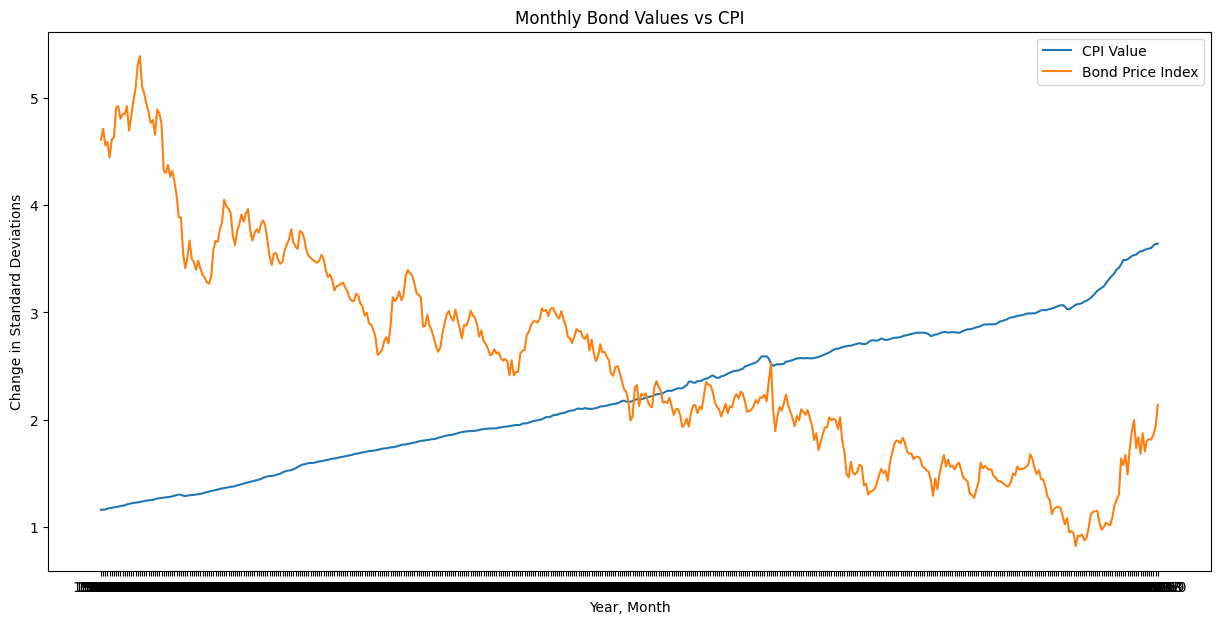

In [13]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(data=df_cpi_monthly_filtered_scaled, x='YearMonth', y='stdvs', label='CPI Value', ax=ax)
sns.lineplot(data=df_bonds_monthly_filtered_scaled, x='YearMonth', y='stdvs', label='Bond Price Index', ax=ax)

plt.title('Monthly Bond Values vs CPI')
plt.xlabel('Year, Month')
plt.ylabel('Change in Standard Deviations')
plt.legend()
plt.show()

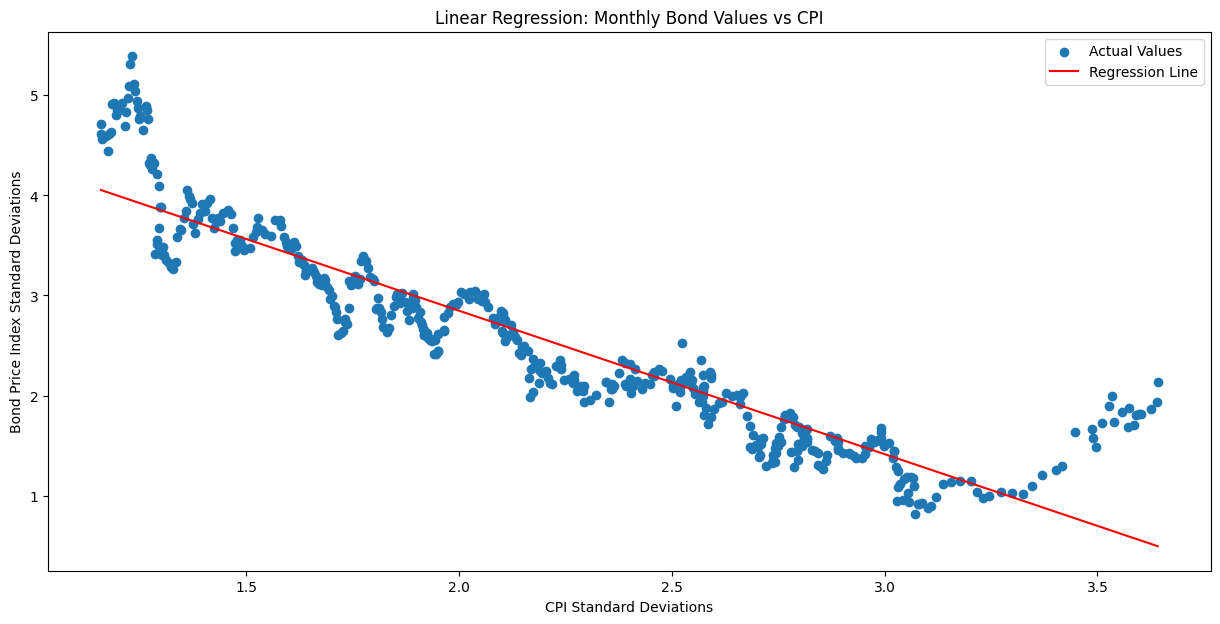

In [14]:
X = df_cpi_monthly_filtered_scaled['stdvs'].values.reshape(-1, 1)  
y = df_bonds_monthly_filtered_scaled['stdvs']             

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Obtain the coefficients
intercept = model.intercept_
slope = model.coef_[0]

predictions = model.predict(X)

# visualize the regression line

plt.figure(figsize=(15, 7))
plt.scatter(X, y, label='Actual Values')
plt.plot(X, predictions, color='red', label='Regression Line')

plt.title('Linear Regression: Monthly Bond Values vs CPI')
plt.xlabel('CPI Standard Deviations')
plt.ylabel('Bond Price Index Standard Deviations')
plt.legend()
plt.show()

<a id="Residuals1"></a>

### **Residuals for Bonds and CPI Regression**

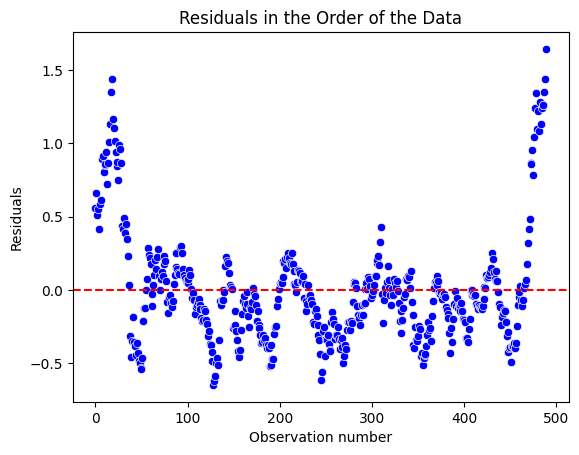

In [15]:
residuals = y - predictions
sns.scatterplot(x=np.arange(len(residuals)), y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals in the Order of the Data')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

<a id="Residuals6"></a>

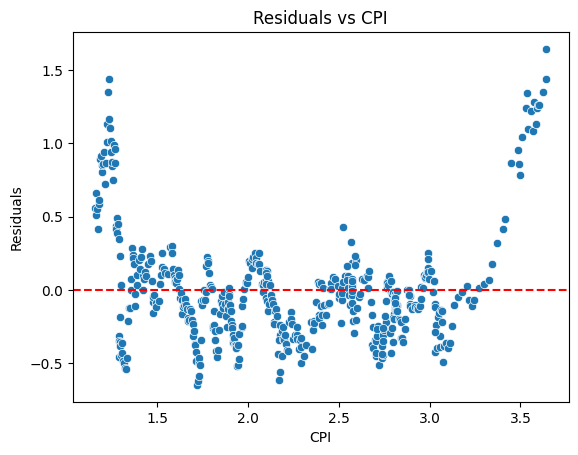

In [16]:
x_feature = X.reshape(-1)
sns.scatterplot(x=x_feature, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs CPI')
plt.xlabel('CPI')
plt.ylabel('Residuals')
plt.show()

<a id="Normality1"></a>

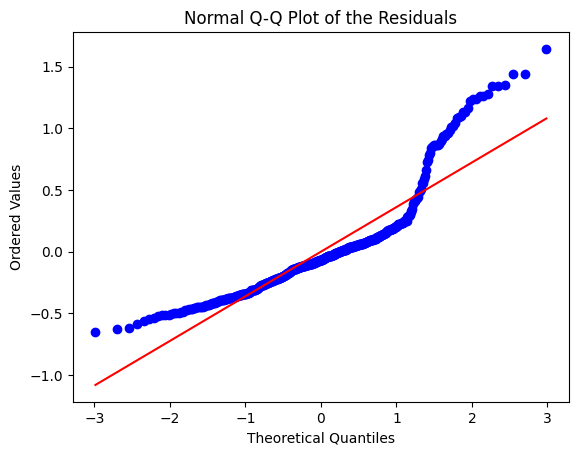

In [17]:
stats.probplot(residuals, dist="norm", plot=py)
py.title('Normal Q-Q Plot of the Residuals')
py.xlabel('Theoretical Quantiles')
py.ylabel('Ordered Values')
py.show()

### **Cross Validated $R^2$ for Bond Values and CPI**

In [18]:
def cv_r2_mse(df1, df2):

    """
    Performs 5-fold cross-validation to evaluate a linear regression model 
    on the data in df1 and df2. Returns the mean cross-validated R^2 and 
    MSE scores.

    Args:
        df1 (DataFrame): DataFrame containing the predictor variable
        df2 (DataFrame): DataFrame containing the response variable

    Returns:
        Series: A Series with the mean CV R^2 and MSE scores  
"""
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2_scores = []
    mse_scores = []
    
    X = df1['stdvs'].values.reshape(-1, 1)  
    y = df2['stdvs'].values

    for train_index, test_index in kf.split(X):

        X_train = X[train_index]  
        X_test = X[test_index]

        y_train, y_test = y[train_index], y[test_index] 
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        r2_scores.append(r2_score(y_test, model.predict(X_test)))
        mse_scores.append(mean_squared_error(y_test, model.predict(X_test)))

    
    return pd.Series({"CV R^2": np.mean(r2_scores), 
                      "CV MSE": np.mean(mse_scores)})


In [19]:
cv_r2_mse(df_cpi_monthly_filtered_scaled, df_bonds_monthly_filtered_scaled)

CV R^2    0.842670
CV MSE    0.157635
dtype: float64

# **AAA Rated Bonds vs GDP**

### **Data Cleaning for GDP VS AAA Rated Corporate Bonds**

In [20]:
df_gdp

,DATE,GDP
0,1946-01-01,.
1,1946-04-01,.
2,1946-07-01,.
3,1946-10-01,.
4,1947-01-01,243.164
...,...,...
306,2022-07-01,25994.639
307,2022-10-01,26408.405
308,2023-01-01,26813.601
309,2023-04-01,27063.012


In [21]:
# df_gdp is quarterly and we have df_bonds_monthly, we need to get the data in df_bonds_monthly which corresponds to months in which the gdp was published
df_gdp['DATE'] = pd.to_datetime(df_gdp['DATE'], errors='coerce')
df_gdp.head()

,DATE,GDP
0,1946-01-01,.
1,1946-04-01,.
2,1946-07-01,.
3,1946-10-01,.
4,1947-01-01,243.164


In [22]:
df_bonds_monthly.head()

,Observation Date,DAAA,YearMonth
0,1983-01-03,11.77,1983-01
1,1983-02-01,12.03,1983-02
2,1983-03-01,11.64,1983-03
3,1983-04-04,11.72,1983-04
4,1983-05-02,11.35,1983-05


In [23]:
df_gdp

,DATE,GDP
0,1946-01-01,.
1,1946-04-01,.
2,1946-07-01,.
3,1946-10-01,.
4,1947-01-01,243.164
...,...,...
306,2022-07-01,25994.639
307,2022-10-01,26408.405
308,2023-01-01,26813.601
309,2023-04-01,27063.012


In [24]:
# Filter gdp data produced before the triple a rated bonds index existed
df_gdp = df_gdp[df_gdp['DATE'] >= '1983-01-01']
df_gdp['YearMonth'] = df_gdp['DATE'].dt.to_period('M')
df_gdp = df_gdp.reset_index()
df_gdp = df_gdp.iloc[:, 2:]

# Drop rows where the value in the second column is a period ('.')
df_gdp = df_gdp[df_gdp.iloc[:, 0] != '.']
df_gdp = df_gdp.reset_index()

# convert elements in df_gdp row from string data type to float
for i in range(len(df_gdp)):
    df_gdp.loc[i, 'GDP'] = pd.to_numeric(df_gdp.loc[i, 'GDP'], errors='coerce')

df_gdp.head()

/var/folders/2l/tqrw4qgn61q4jrsxc447rydm0000gn/T/ipykernel_85303/4128209570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp['YearMonth'] = df_gdp['DATE'].dt.to_period('M')


,index,GDP,YearMonth
0,0,3473.413,1983-01
1,1,3578.848,1983-04
2,2,3689.179,1983-07
3,3,3794.706,1983-10
4,4,3908.054,1984-01


In [25]:
# create df_bonds_quarterly by choosing only the monthly data for which we have gdp values
df_bonds_quarterly = pd.merge(df_bonds_monthly, df_gdp[['YearMonth']], on='YearMonth', how='inner')

In [26]:
# scale the features
df_bonds_quarterly_scaled = pd.DataFrame()
df_gdp_scaled = pd.DataFrame()

bonds_quarterly_std = df_bonds_quarterly['DAAA'].std()
df_bonds_quarterly_scaled['YearMonth'] = df_bonds_quarterly['YearMonth']
df_bonds_quarterly_scaled['stdvs'] = df_bonds_quarterly['DAAA']/bonds_quarterly_std

gdp_quarterly_std = df_gdp['GDP'].std()
df_gdp_scaled['YearMonth'] = df_gdp['YearMonth']
df_gdp_scaled['stdvs'] = df_gdp['GDP']/gdp_quarterly_std

In [27]:
print(df_bonds_quarterly_scaled.shape)
print(df_gdp_scaled.shape)

(163, 2)
(163, 2)


In [28]:
# Convert 'YearMonth' from Period to String for correct graphing
df_bonds_quarterly_scaled['YearMonth'] = df_bonds_quarterly_scaled['YearMonth'].astype(str)
df_gdp_scaled['YearMonth'] = df_gdp_scaled['YearMonth'].astype(str)

### **Visualizations for GDP vs Bond Values**

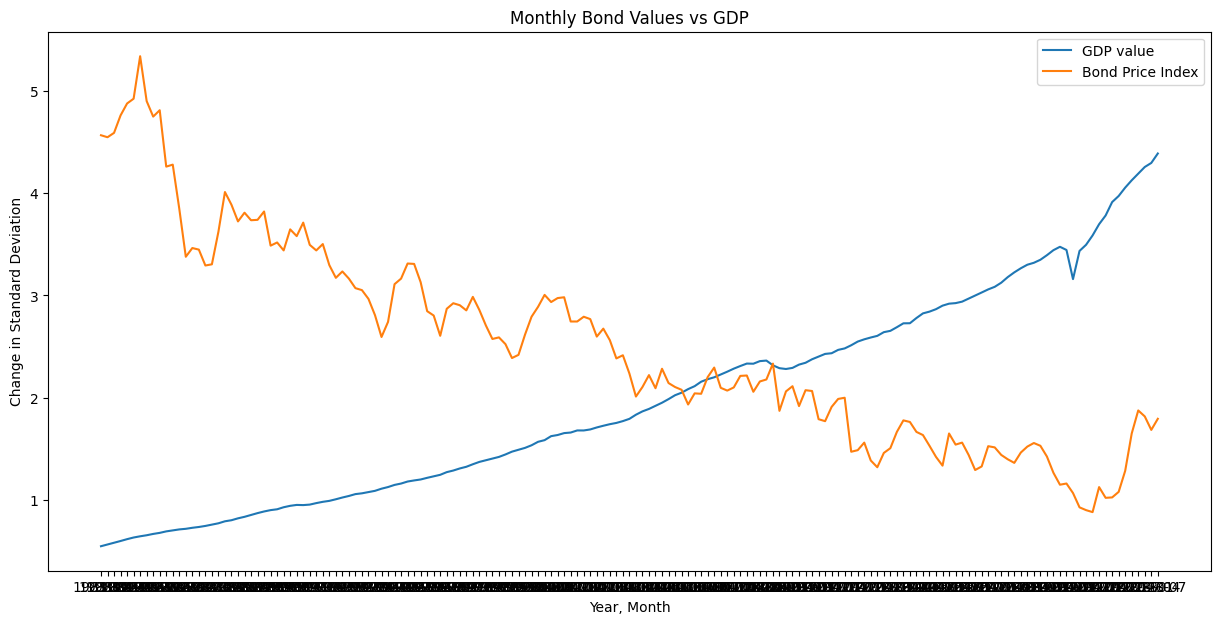

In [29]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(data=df_gdp_scaled, x='YearMonth', y='stdvs', label='GDP value', ax=ax)
sns.lineplot(data=df_bonds_quarterly_scaled, x='YearMonth', y='stdvs', label='Bond Price Index', ax=ax)

plt.title('Monthly Bond Values vs GDP')
plt.xlabel('Year, Month')
plt.ylabel('Change in Standard Deviation')
plt.legend()
plt.show()

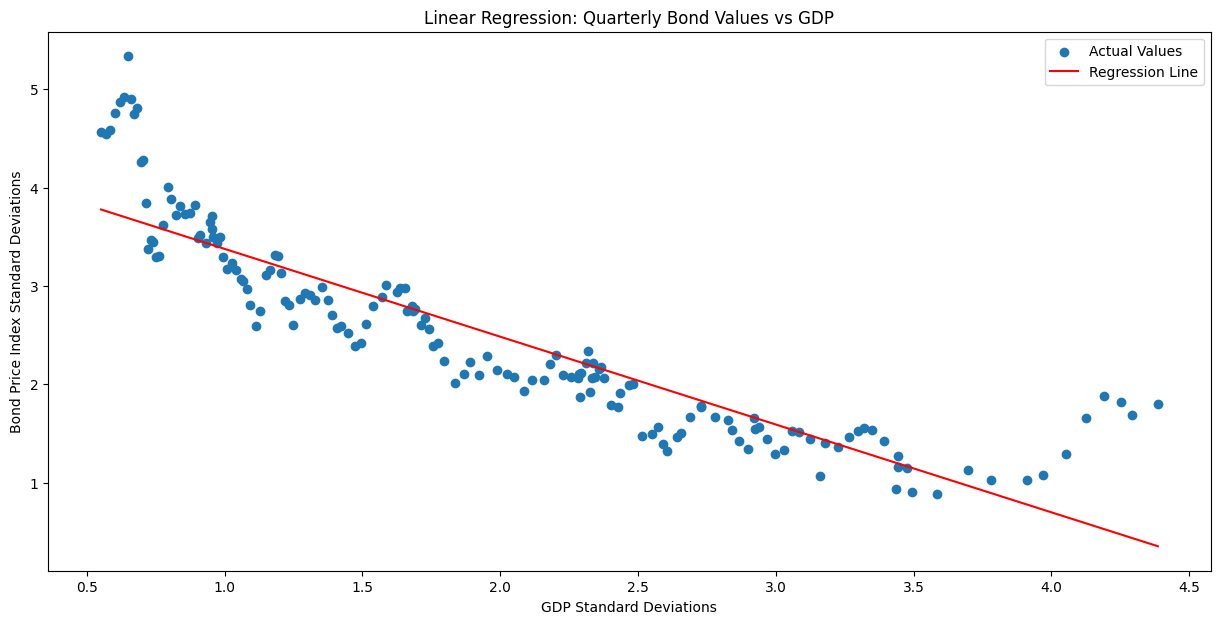

In [30]:
# GDP standard deviations
X = df_gdp_scaled['stdvs'].values.reshape(-1, 1)  

# Bond price index standard deviations
y = df_bonds_quarterly_scaled['stdvs'].values    

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Obtain the coefficients
intercept = model.intercept_
slope = model.coef_[0]

predictions = model.predict(X)

# Plot the actual values and the regression line
plt.figure(figsize=(15, 7))
plt.scatter(X, y, label='Actual Values')
plt.plot(X, predictions, color='red', label='Regression Line')

plt.title('Linear Regression: Quarterly Bond Values vs GDP')
plt.xlabel('GDP Standard Deviations')
plt.ylabel('Bond Price Index Standard Deviations')
plt.legend()
plt.show()

<a id="Residuals2"></a>

### **Residuals for GDP vs Bond Values**

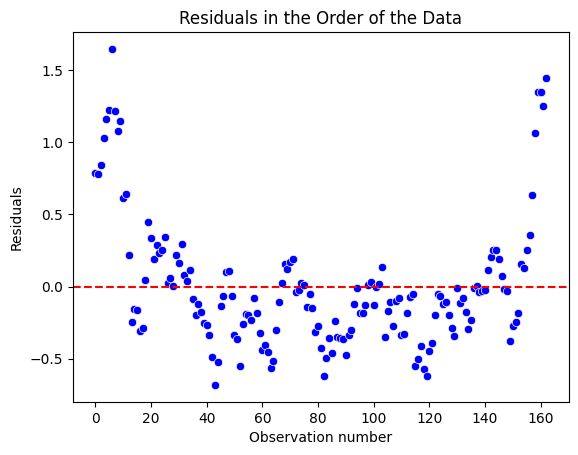

In [31]:
residuals = y - predictions
sns.scatterplot(x=np.arange(len(residuals)), y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals in the Order of the Data')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

<a id="Residuals5"></a>

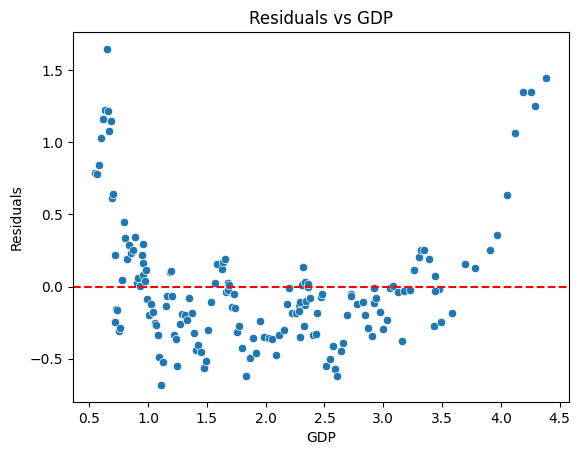

In [32]:
x_feature = X.reshape(-1)
sns.scatterplot(x=x_feature, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs GDP')
plt.xlabel('GDP')
plt.ylabel('Residuals')
plt.show()

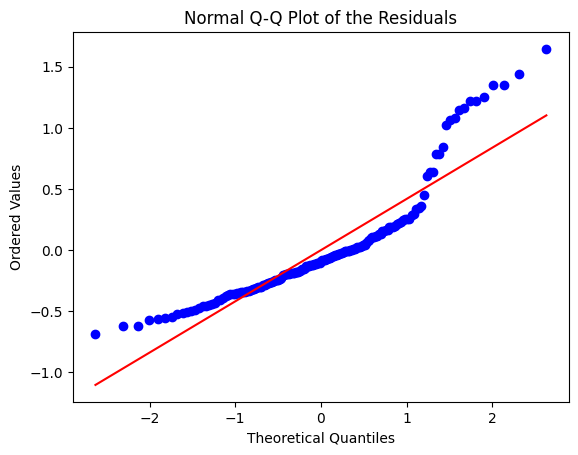

In [33]:
stats.probplot(residuals, dist="norm", plot=py)
py.title('Normal Q-Q Plot of the Residuals')
py.xlabel('Theoretical Quantiles')
py.ylabel('Ordered Values')
py.show()

<a id="Normality2"></a>

### **Cross Validated $R^2$ for Bond Values vs GDP**

In [34]:
def cv_r2_mse(df1, df2):
    """
    Performs 5-fold cross-validation to evaluate a linear regression model 
    on the data in df1 and df2. Returns the mean cross-validated R^2 and 
    MSE scores.

    Args:
        df1 (DataFrame): DataFrame containing the predictor variable
        df2 (DataFrame): DataFrame containing the response variable

    Returns:
        Series: A Series with the mean CV R^2 and MSE scores  
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2_scores = []
    mse_scores = []
    
    X = df1['stdvs'].values.reshape(-1, 1)  
    y = df2['stdvs'].values

    for train_index, test_index in kf.split(X):

        X_train = X[train_index]  
        X_test = X[test_index]

        y_train, y_test = y[train_index], y[test_index] 
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        r2_scores.append(r2_score(y_test, model.predict(X_test)))
        mse_scores.append(mean_squared_error(y_test, model.predict(X_test)))

    
    return pd.Series({"CV R^2": np.mean(r2_scores), 
                      "CV MSE": np.mean(mse_scores)})

In [35]:
cv_r2_mse(df_gdp_scaled, df_bonds_quarterly_scaled)

CV R^2    0.771149
CV MSE    0.212852
dtype: float64

# **Unemployment vs AAA Rated Bonds**

### **Data Cleaning for Unemployment Rate VS AAA Rated Corporate Bonds**

In [36]:
df_bonds['YearMonth'] = pd.to_datetime(df_bonds['Observation Date'])
df_employment['YearMonth'] = pd.to_datetime(df_employment['DATE'])

# Merge df_bonds and df_employment on 'Observation Date'
merged_df_common_dates = pd.merge(df_bonds, df_employment, on='YearMonth', how='inner')


merged_df_employment = pd.concat([merged_df_common_dates['YearMonth'], merged_df_common_dates['Unemployment Rate']], axis=1)
merged_df_bonds_monthly = pd.concat([merged_df_common_dates['YearMonth'], merged_df_common_dates['DAAA']], axis=1)
drop_indexes = merged_df_bonds_monthly[merged_df_bonds_monthly['DAAA']=='.'].index

# Drop rows by index to keep df shape aligned  
merged_df_bonds_monthly = merged_df_bonds_monthly.drop(drop_indexes)
merged_df_employment = merged_df_employment.drop(drop_indexes)

merged_df_bonds_monthly['DAAA'] = merged_df_bonds_monthly['DAAA'].astype(float)
merged_df_employment['Unemployment Rate'] = merged_df_employment['Unemployment Rate'].astype(float)

merged_df_bonds_monthly_scaled = merged_df_bonds_monthly
merged_df_bonds_monthly_scaled['DAAA'] = merged_df_bonds_monthly_scaled['DAAA']/merged_df_bonds_monthly_scaled['DAAA'].std()
merged_df_employment_scaled = merged_df_employment
merged_df_employment_scaled['Unemployment Rate'] = merged_df_employment_scaled['Unemployment Rate']/merged_df_employment_scaled['Unemployment Rate'].std()


print(merged_df_bonds_monthly.head())
print(merged_df_employment)

   YearMonth      DAAA
0 1983-02-01  4.693560
1 1983-03-01  4.541400
2 1983-06-01  4.596021
3 1983-07-01  4.615529
4 1983-08-01  4.892539
     YearMonth  Unemployment Rate
0   1983-02-01           5.703575
1   1983-03-01           5.648733
2   1983-06-01           5.539049
3   1983-07-01           5.155155
4   1983-08-01           5.209997
..         ...                ...
308 2023-03-01           1.919472
309 2023-05-01           2.029157
310 2023-06-01           1.974314
311 2023-08-01           2.083999
312 2023-09-01           2.083999

[313 rows x 2 columns]


### **Visualizations for Employment vs Bond**

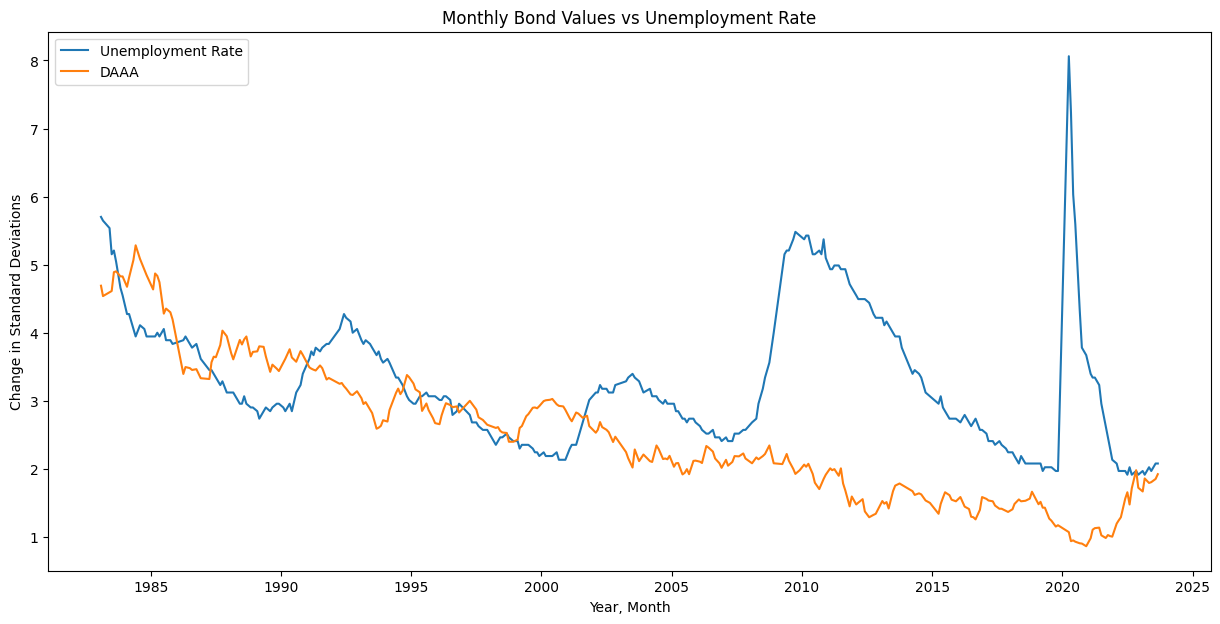

In [37]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(data=merged_df_employment_scaled, x='YearMonth', y='Unemployment Rate', label='Unemployment Rate', ax=ax)
sns.lineplot(data=merged_df_bonds_monthly_scaled, x='YearMonth', y='DAAA', label='DAAA', ax=ax)

plt.title('Monthly Bond Values vs Unemployment Rate')
plt.xlabel('Year, Month')
plt.ylabel('Change in Standard Deviations')
plt.legend()
plt.show()

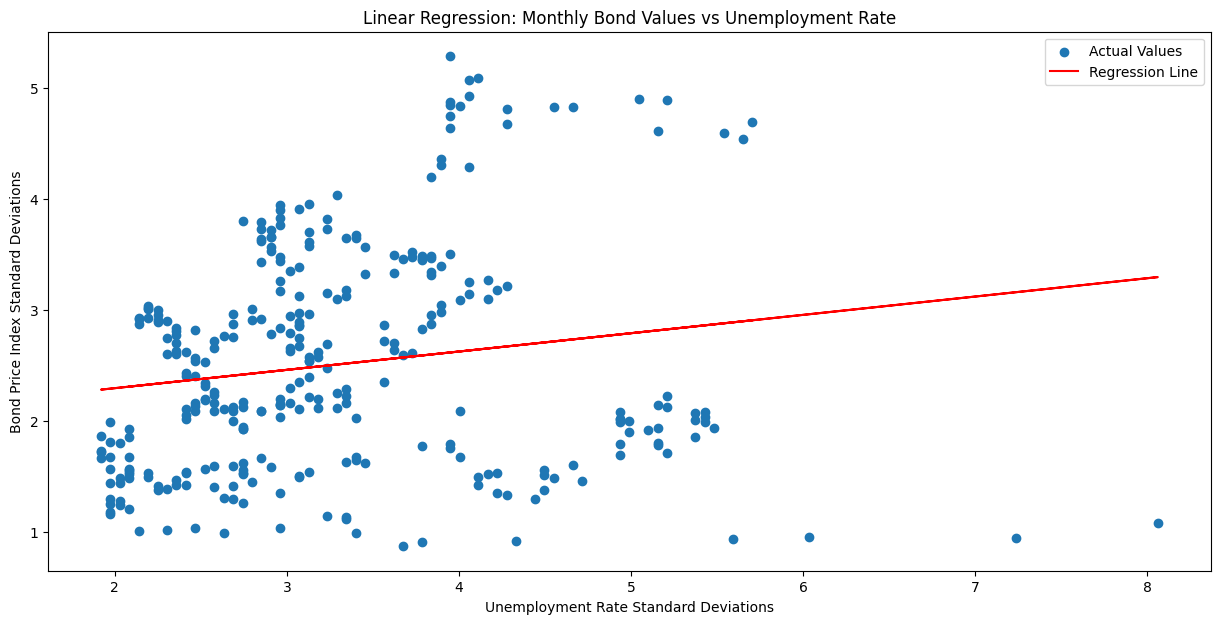

In [38]:
# GDP standard deviations
X = merged_df_employment_scaled[['Unemployment Rate']].values.reshape(-1,1)
y = merged_df_bonds_monthly_scaled['DAAA'].values.flatten()  

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Obtain the coefficients
intercept = model.intercept_
slope = model.coef_[0]

predictions = model.predict(X)

# Plot the actual values and the regression line
plt.figure(figsize=(15, 7))
plt.scatter(X, y, label='Actual Values')
plt.plot(X, predictions, color='red', label='Regression Line')

plt.title('Linear Regression: Monthly Bond Values vs Unemployment Rate')
plt.xlabel('Unemployment Rate Standard Deviations')
plt.ylabel('Bond Price Index Standard Deviations')
plt.legend()
plt.show()

<a id="Residuals3"></a>

### **Residuals for Employment vs Bond**

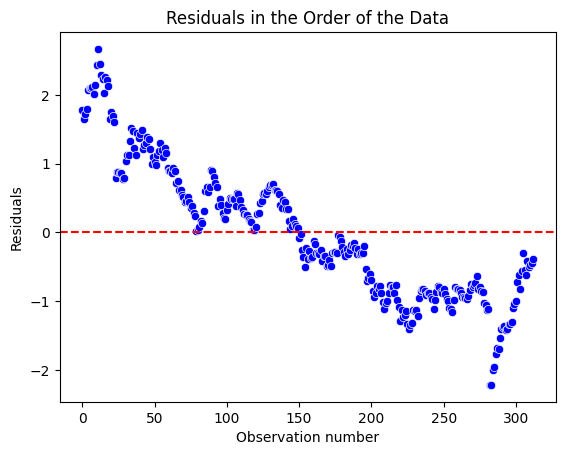

In [39]:
residuals = y - predictions
sns.scatterplot(x=np.arange(len(residuals)), y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals in the Order of the Data')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

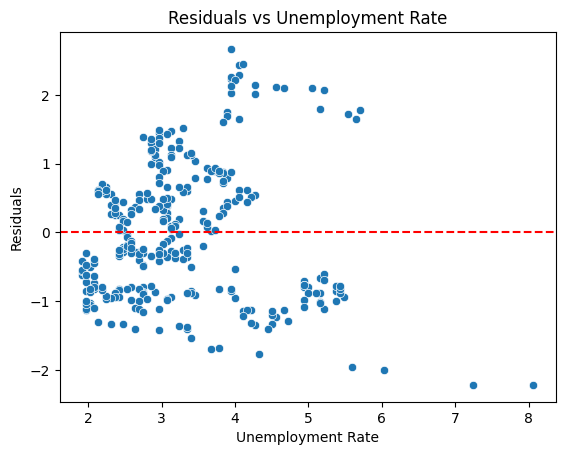

In [40]:
x_feature = X.reshape(-1)
sns.scatterplot(x=x_feature, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Residuals')
plt.show()

<a id="Normality3"></a>

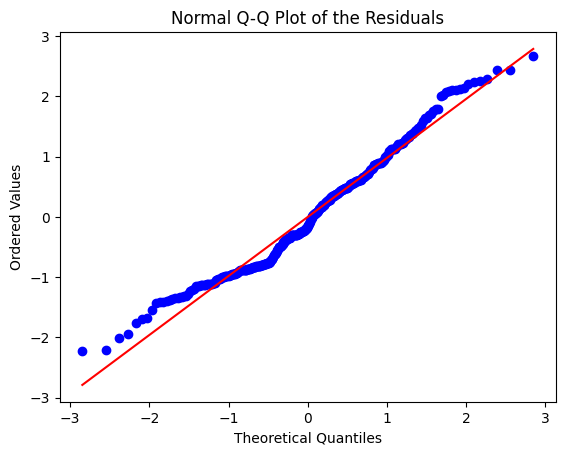

In [41]:
stats.probplot(residuals, dist="norm", plot=py)
py.title('Normal Q-Q Plot of the Residuals')
py.xlabel('Theoretical Quantiles')
py.ylabel('Ordered Values')
py.show()

### **Cross Validated $R^2$ for Employment vs Bonds**

In [42]:
def cv_r2_mse(df1, df2):
    """
    Performs 5-fold cross-validation to evaluate a linear regression model 
    on the data in df1 and df2. Returns the mean cross-validated R^2 and 
    MSE scores.

    Args:
        df1 (DataFrame): DataFrame containing the predictor variable
        df2 (DataFrame): DataFrame containing the response variable

    Returns:
        Series: A Series with the mean CV R^2 and MSE scores  
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2_scores = []
    mse_scores = []
    
    X = df1[['Unemployment Rate']].values.reshape(-1,1)
    y = df2['DAAA'].values

    for train_index, test_index in kf.split(X):

        X_train = X[train_index]  
        X_test = X[test_index]

        y_train, y_test = y[train_index], y[test_index] 
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        r2_scores.append(r2_score(y_test, model.predict(X_test)))
        mse_scores.append(mean_squared_error(y_test, model.predict(X_test)))

    
    return pd.Series({"CV R^2": np.mean(r2_scores), 
                      "CV MSE": np.mean(mse_scores)})

In [43]:
metrics = cv_r2_mse(merged_df_employment_scaled, merged_df_bonds_monthly_scaled)
metrics

CV R^2   -0.004641
CV MSE    0.987519
dtype: float64

# **Federal Reserve Interest Rates vs AAA Rated Bonds**

### **Data Cleaning for Interest Rates vs Bonds**

In [44]:
df_interest['YearMonth'] = pd.to_datetime(df_interest['DATE']).dt.to_period('M')

# Merge the 'YearMonth' columns
merged_df = pd.merge(df_bonds_monthly, df_interest[['YearMonth', 'Interest Rate']], on='YearMonth', how='inner')

# Correctly drop non-numeric rows from both columns
drop_indexes_daaa = merged_df[merged_df['DAAA'] == '.'].index
merged_df = merged_df.drop(drop_indexes_daaa)

drop_indexes_interest = merged_df[merged_df['Interest Rate'] == '.'].index
merged_df = merged_df.drop(drop_indexes_interest)

# Convert both 'DAAA' and 'Interest Rate' columns to numeric, coercing errors to NaN
merged_df['DAAA'] = pd.to_numeric(merged_df['DAAA'], errors='coerce')
merged_df['Interest Rate'] = pd.to_numeric(merged_df['Interest Rate'], errors='coerce')

# Drop NaN values that were non-numeric
merged_df.dropna(subset=['DAAA', 'Interest Rate'], inplace=True)

# Scale the data
merged_df_scaled = merged_df.copy()
merged_df_scaled['DAAA'] /= merged_df_scaled['DAAA'].std()
merged_df_scaled['Interest Rate'] /= merged_df_scaled['Interest Rate'].std()

# Convert 'YearMonth' to string 
merged_df_scaled['YearMonth'] = merged_df_scaled['YearMonth'].astype(str)

### **Visualizations for Interest Rate vs Bonds**

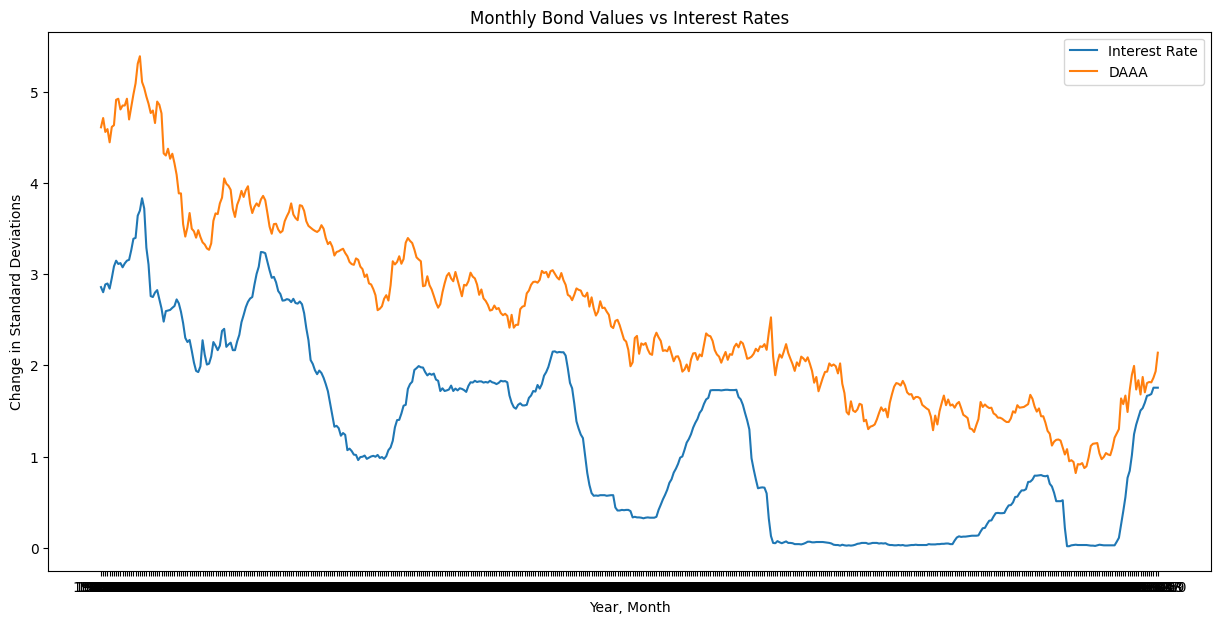

In [45]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(data=merged_df_scaled, x='YearMonth', y='Interest Rate', label='Interest Rate', ax=ax)
sns.lineplot(data=merged_df_scaled, x='YearMonth', y='DAAA', label='DAAA', ax=ax)

plt.title('Monthly Bond Values vs Interest Rates')
plt.xlabel('Year, Month')
plt.ylabel('Change in Standard Deviations')
plt.legend()
plt.show()

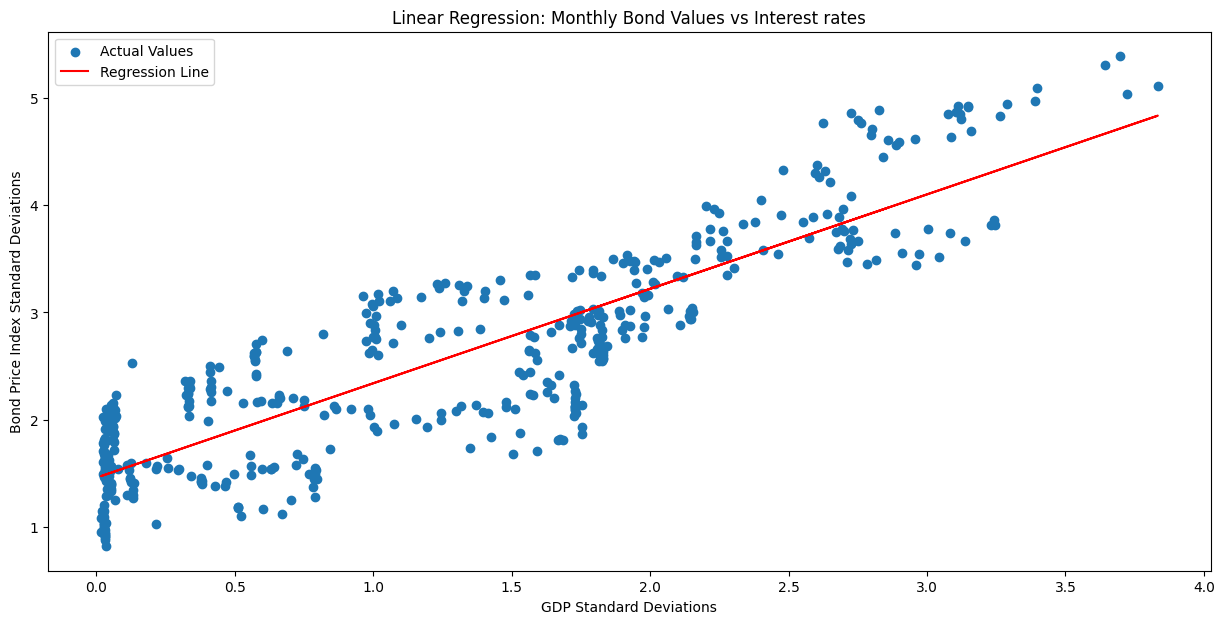

In [46]:
# standard deviations
X = merged_df_scaled[['Interest Rate']].values.reshape(-1,1)
y = merged_df_scaled['DAAA'].values.flatten()  

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Obtain the coefficients
intercept = model.intercept_
slope = model.coef_[0]

predictions = model.predict(X)

# Plot the actual values and the regression line
plt.figure(figsize=(15, 7))
plt.scatter(X, y, label='Actual Values')
plt.plot(X, predictions, color='red', label='Regression Line')

plt.title('Linear Regression: Monthly Bond Values vs Interest rates')
plt.xlabel('GDP Standard Deviations')
plt.ylabel('Bond Price Index Standard Deviations')
plt.legend()
plt.show()

<a id="Residuals4"></a>

### **Residuals for Interest Rate vs Bonds**

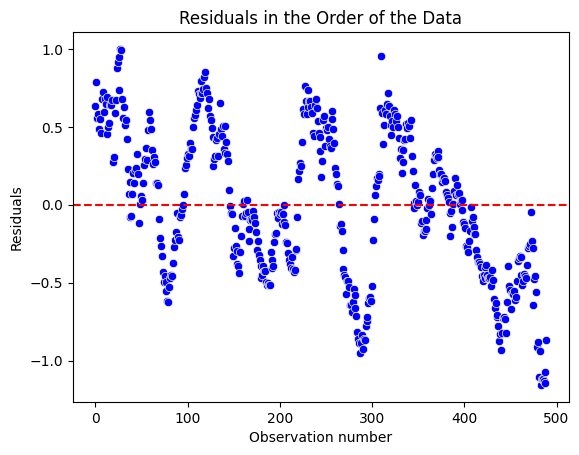

In [47]:
residuals = y - predictions
sns.scatterplot(x=np.arange(len(residuals)), y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals in the Order of the Data')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

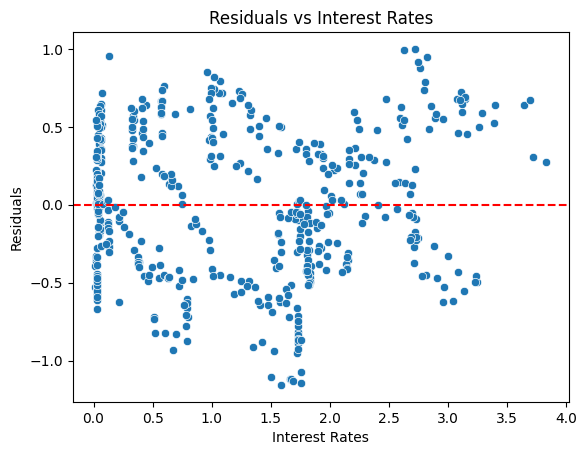

In [48]:
x_feature = X.reshape(-1)
sns.scatterplot(x=x_feature, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Interest Rates')
plt.xlabel('Interest Rates')
plt.ylabel('Residuals')
plt.show()

<a id="Normality4"></a>

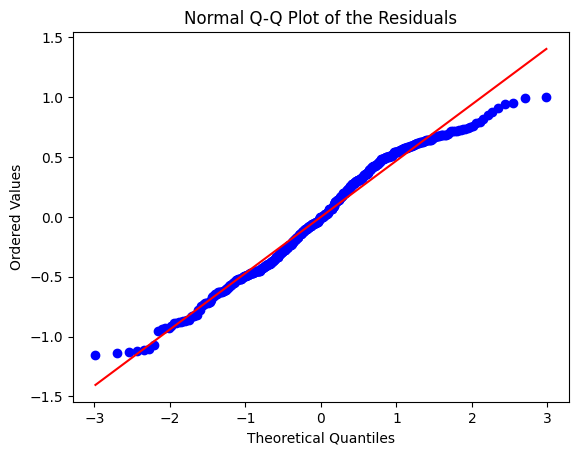

In [49]:
stats.probplot(residuals, dist="norm", plot=py)
py.title('Normal Q-Q Plot of the Residuals')
py.xlabel('Theoretical Quantiles')
py.ylabel('Ordered Values')
py.show()

### **Cross-Validated $R^2$ for Interest Rate vs Bonds**

In [50]:
def cv_r2_mse(df1, df2):
    """
    Performs 5-fold cross-validation to evaluate a linear regression model 
    on the data in df1 and df2. Returns the mean cross-validated R^2 and 
    MSE scores.

    Args:
        df1 (DataFrame): DataFrame containing the predictor variable
        df2 (DataFrame): DataFrame containing the response variable

    Returns:
        Series: A Series with the mean CV R^2 and MSE scores  
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    r2_scores = []
    mse_scores = []
    
    X = df1[['Interest Rate']].values.reshape(-1,1)
    y = df2['DAAA'].values

    for train_index, test_index in kf.split(X):

        X_train = X[train_index]  
        X_test = X[test_index]

        y_train, y_test = y[train_index], y[test_index] 
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        r2_scores.append(r2_score(y_test, model.predict(X_test)))
        mse_scores.append(mean_squared_error(y_test, model.predict(X_test)))

    
    return pd.Series({"CV R^2": np.mean(r2_scores), 
                      "CV MSE": np.mean(mse_scores)})

In [51]:
metrics = cv_r2_mse(merged_df_scaled, merged_df_scaled)
metrics

CV R^2    0.765045
CV MSE    0.229070
dtype: float64

# **Part 2: How can we make a model that predicts the price movements of high yield corporate bonds before they happen making use of economic indicators?**

In [52]:
df_gdp_extra = df_gdp.copy()
df_gdp_extra.reset_index(inplace=True, col_level=0, col_fill='index')
df_gdp_extra['index'] = np.arange(len(df_gdp_extra)) * 3  

# List to store new rows
new_rows = []

# Iterate through data rows
for i, row in df_gdp_extra.iterrows():

    # Append existing row
    new_rows.append(row)

    # Create 2 new rows with same GDP value
    for j in range(1,3):
        new_row = row.copy()
        new_row['index'] += j
       
        # Convert period to timestamp
        month_ts = row['YearMonth'].to_timestamp()  
       
        # Increment timestamp by months
        new_month_ts = month_ts + pd.DateOffset(months=j)

        # Convert timestamp back to period
        new_row['YearMonth'] = pd.Period(new_month_ts, freq='M')
       
        new_rows.append(new_row)

# Create new dataframe
df_filled = pd.DataFrame(new_rows)  

df_filled = df_filled.reset_index(drop=True)

# Drop level_0 if present
if 'level_0' in df_filled.columns:
    df_filled.drop(columns=['level_0'], inplace=True)
   

# Drop temp index    
df_filled.drop('index', axis=1, inplace=True)
df_filled

,GDP,YearMonth
0,3473.413,1983-01
1,3473.413,1983-02
2,3473.413,1983-03
3,3578.848,1983-04
4,3578.848,1983-05
...,...,...
484,27063.012,2023-05
485,27063.012,2023-06
486,27644.463,2023-07
487,27644.463,2023-08


In [53]:
# bonds monthly
df_bonds_monthly
# gdp monthly
df_filled
# cpi monthly
df_cpi
# unemployment
merged_df_employment['YearMonth'] = pd.to_datetime(merged_df_employment['YearMonth']).dt.to_period('M')
# Interest rate Monthly
df_interest_final = pd.concat([merged_df['YearMonth'], merged_df['Interest Rate']], axis=1)

In [54]:
df_cpi = df_cpi.drop('DATE', axis=1)

In [55]:
df_bonds_monthly = df_bonds_monthly.drop('Observation Date', axis=1)

In [56]:
# Scale each relevant column by its standard deviation
df_bonds_monthly['DAAA'] /= df_bonds_monthly['DAAA'].std()
df_filled['GDP'] /= df_filled['GDP'].std()
df_cpi['Consumer Price Index'] /= df_cpi['Consumer Price Index'].std()
merged_df_employment['Unemployment Rate'] /= merged_df_employment['Unemployment Rate'].std()
df_interest_final['Interest Rate'] /= df_interest_final['Interest Rate'].std()

# Merge all dataframes on 'YearMonth' using an inner join
df_merged = pd.merge(df_interest_final, df_bonds_monthly, on='YearMonth', how='inner')
df_merged = pd.merge(df_merged, df_filled, on='YearMonth', how='inner')
df_merged = pd.merge(df_merged, df_cpi, on='YearMonth', how='inner')
df_final = pd.merge(df_merged, merged_df_employment, on='YearMonth', how='inner')
df_final

,YearMonth,Interest Rate,DAAA,GDP,Consumer Price Index,Unemployment Rate
0,1983-02,2.802611,4.717700,0.552226,1.160173,5.703575
1,1983-03,2.888237,4.564757,0.552226,1.161357,5.648733
2,1983-06,2.957397,4.619660,0.568989,1.176747,5.539049
3,1983-07,3.085836,4.639268,0.586530,1.181483,5.155155
4,1983-08,3.148409,4.917703,0.586530,1.185034,5.209997
...,...,...,...,...,...,...
308,2023-03,1.531392,1.874531,4.263006,3.572955,1.919472
309,2023-05,1.666417,1.807864,4.302659,3.590547,2.029157
310,2023-06,1.673004,1.819628,4.302659,3.597023,1.974314
311,2023-08,1.755337,1.866688,4.395102,3.625767,2.083999


In [57]:
# Data prep    
y = df_final['DAAA']  
X = df_final.drop(['DAAA','YearMonth'], axis=1)

for col in X.select_dtypes('object'):
    X[col] = X[col].astype(float)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

# Polynomial transform
polynomial = PolynomialFeatures(degree=2)

X_train_poly = polynomial.fit_transform(X_train)
X_test_poly = polynomial.fit_transform(X_test)

# Linear regression 
model = LinearRegression() 

model.fit(X_train_poly, y_train)

LinearRegression()

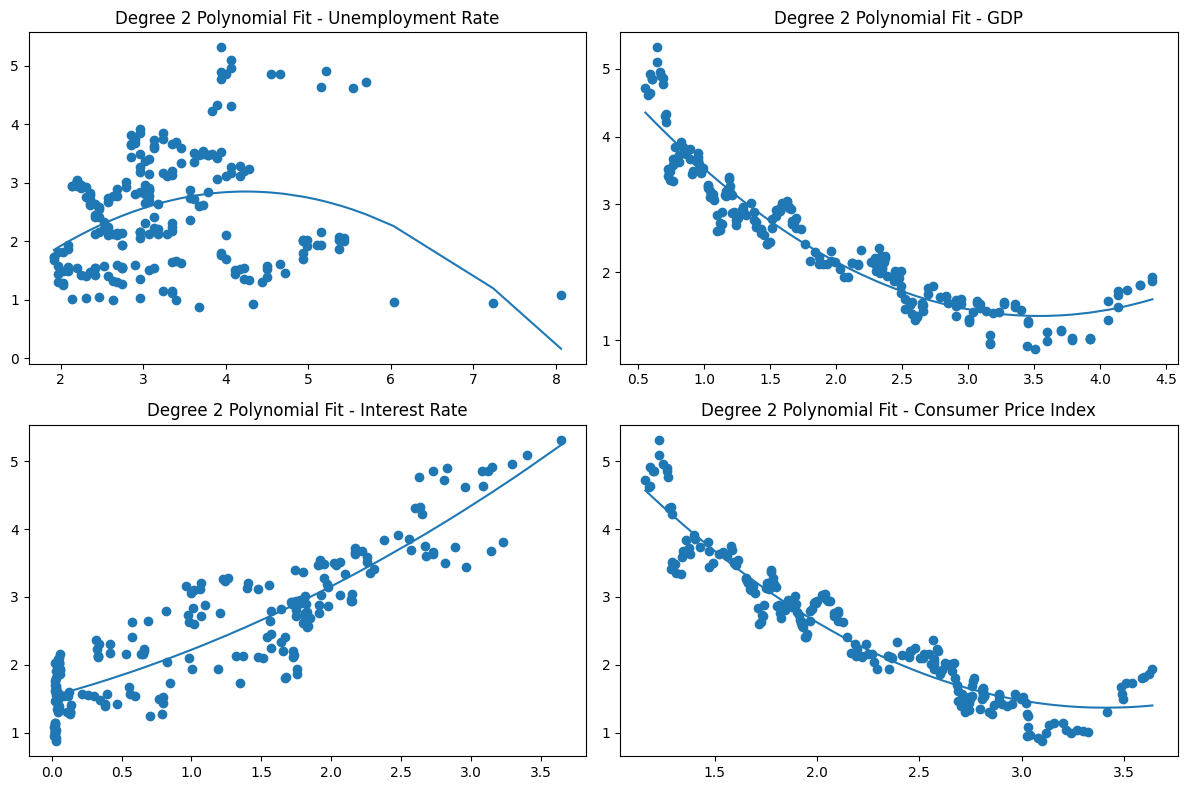

In [58]:
variables = ['Unemployment Rate', 'GDP', 'Interest Rate', 'Consumer Price Index']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, var in enumerate(variables):
    
    ax = axs[i//2, i%2] 
    ax.scatter(X_train[var], y_train)
    
    poly_deg = 2
    poly_fit = np.poly1d(np.polyfit(X_train[var], y_train, poly_deg)) 
    
    ax.plot(np.unique(X_train[var]), poly_fit(np.unique(X_train[var])))
        
    ax.set_title(f"Degree {poly_deg} Polynomial Fit - {var}")

plt.tight_layout()
plt.show()

<a id="graph1"></a>

<a id="MultiplePolynomialRegression"></a>

In [59]:
#Fit the whole model
# Extract GDP and CPI as features  
X = df_final[['GDP', 'Consumer Price Index']]  

# AAA Bonds as target
y = df_final['DAAA']   

# Polynomial transformation
poly = PolynomialFeatures(degree=2)  

X = poly.fit_transform(X)

# Polynomial regression
model = LinearRegression()
model.fit(X, y)

# Evaluation  
r2 = model.score(X, y)  

n = len(y_test)
p = X_test_poly.shape[1]
r2_adj = 1 - (1 - r2)*(n - 1)/(n - p - 1)  
coefficients = model.coef_

y_pred = model.predict(X)

print('Polynomial Regression Results (Degree 2)')
print('Adjusted R-Squared:', r2_adj)
print('model Coefficients', coefficients)

Polynomial Regression Results (Degree 2)
Adjusted R-Squared: 0.9113029248479723
model Coefficients [ 0.         -0.64815914 -4.86084047 -0.25775619  0.42069296  0.82769091]


### Model Function

y = β₀ + β₁x₁ + β₂x₂ + β₃x₁² + β₄x₁x₂ + β₅x₂²

Where:
- y is the predicted AAA Bonds value
- x₁ is the GDP
- x₂ is the Consumer Price Index
- β₀ to β₅ are the model coefficients

Substituting in your coefficients:

y = 0 - 0.64815914x₁ - 4.86084047x₂ - 0.25775619x₁² + 0.42069296x₁x₂ + 0.82769091x₂²


<a id="poly1"></a>

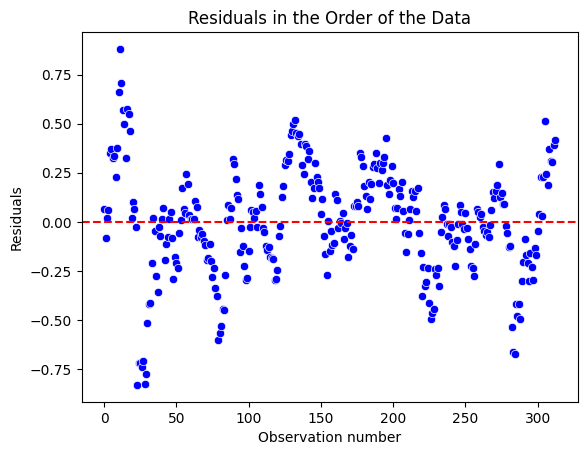

In [60]:
residuals = y - y_pred
sns.scatterplot(x=np.arange(len(residuals)), y=residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals in the Order of the Data')
plt.xlabel('Observation number')
plt.ylabel('Residuals')
plt.show()

<a id="poly2"></a>

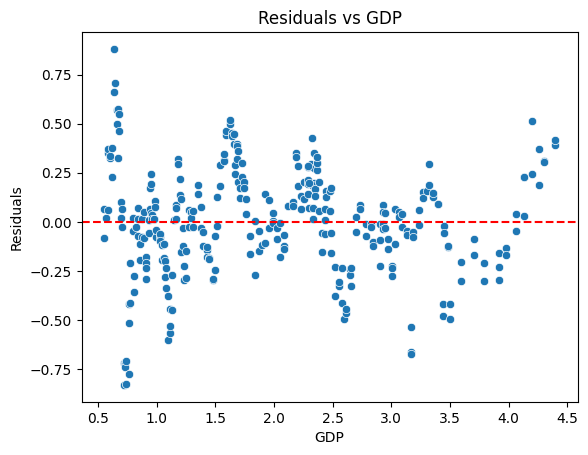

In [61]:
x_feature = np.array(df_final[['GDP']]).reshape(-1)
sns.scatterplot(x=x_feature, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs GDP')
plt.xlabel('GDP')
plt.ylabel('Residuals')
plt.show()

<a id="poly3"></a>

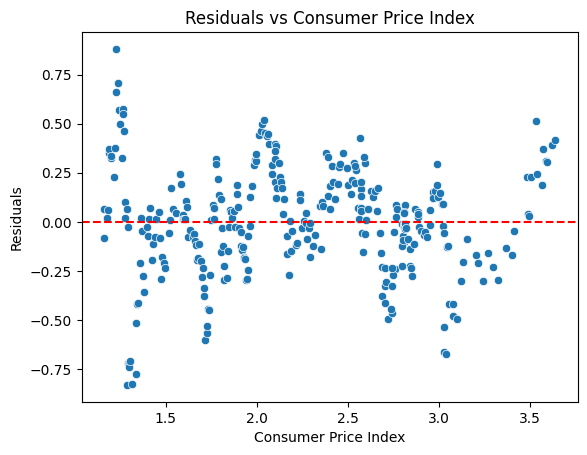

In [62]:
x_feature =  np.array(df_final[['Consumer Price Index']]).reshape(-1)
sns.scatterplot(x=x_feature, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Consumer Price Index')
plt.xlabel('Consumer Price Index')
plt.ylabel('Residuals')
plt.show()

<a id="poly4"></a>

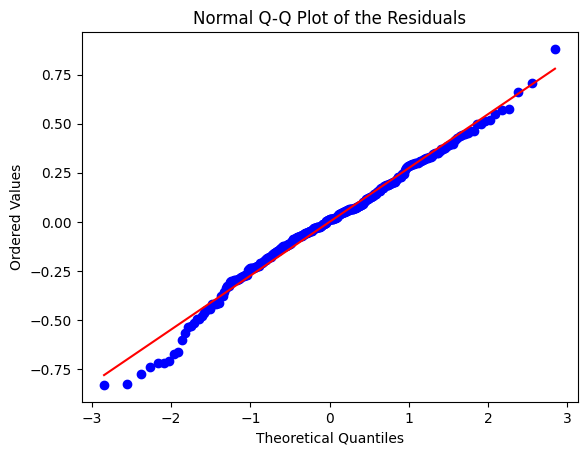

In [63]:
stats.probplot(residuals, dist="norm", plot=py)
py.title('Normal Q-Q Plot of the Residuals')
py.xlabel('Theoretical Quantiles')
py.ylabel('Ordered Values')
py.show()

In [64]:
def cv_adjusted_r2(df, degree=2):
    """
    Performs 5-fold cross-validation to evaluate a polynomial regression model 
    on the data in df. Returns the mean cross-validated adjusted R^2 score.

    Args:
        df (DataFrame): DataFrame containing the features and the response variable
        degree (int): Degree of the polynomial transformation

    Returns:
        float: The mean cross-validated adjusted R^2 score
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    adjusted_r2_scores = []
    
    # Features and Target
    X = df[['GDP', 'Consumer Price Index']].values
    y = df['DAAA'].values

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Polynomial transformation
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Polynomial regression
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test_poly)
        r2 = r2_score(y_test, y_pred)

        # Adjusted R^2
        n = len(y_test)
        p = X_test_poly.shape[1]
        r2_adj = 1 - (1 - r2)*(n - 1)/(n - p - 1)
        adjusted_r2_scores.append(r2_adj)

    return np.mean(adjusted_r2_scores)

mean_adj_r2 = cv_adjusted_r2(df_final, degree=2)
print('Polynomial Regression Results (Degree 2)')
print('Mean Cross-Validated Adjusted R-Squared:', mean_adj_r2)

Polynomial Regression Results (Degree 2)
Mean Cross-Validated Adjusted R-Squared: 0.9114328035359914


In [65]:
# Separate target variable 
y = df_final['DAAA']  
X = df_final.drop(['DAAA','YearMonth'], axis=1)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
rf_reg.fit(X_train, y_train)  

# Make predictions and evalute
y_pred = rf_reg.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Examine feature importances
importances = rf_reg.feature_importances_
features = X.columns
sorted_idx = rf_reg.feature_importances_.argsort()

for i in sorted_idx:
    print('{} - {}'.format(features[i], importances[i]))

R-squared: 0.9895311501635973
Unemployment Rate - 0.012921440751258078
Interest Rate - 0.044484287315854694
GDP - 0.4459162912017271
Consumer Price Index - 0.49667798073116004


<a id="graph2"></a>

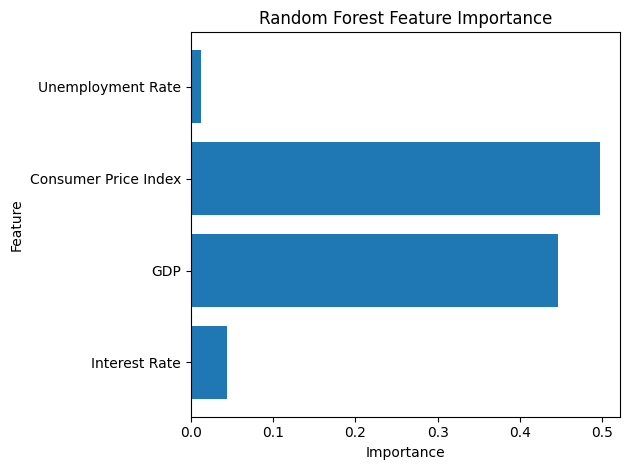

In [66]:
# Plot feature importances
plt.barh(features, importances)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

<a id="graph3"></a>

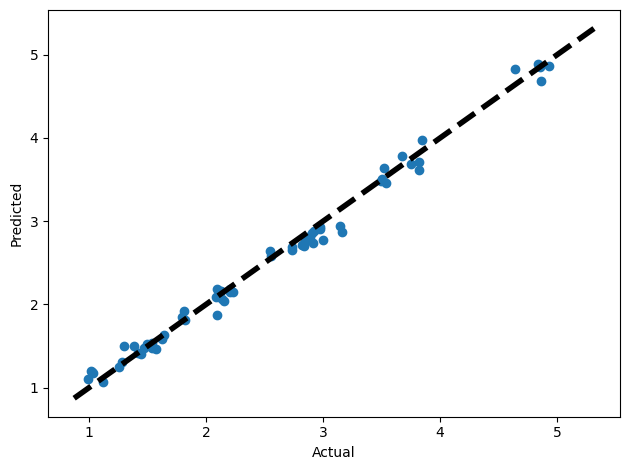

In [67]:
# Plot actual vs predicted
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.tight_layout()
plt.show()

<a id="graph4"></a>

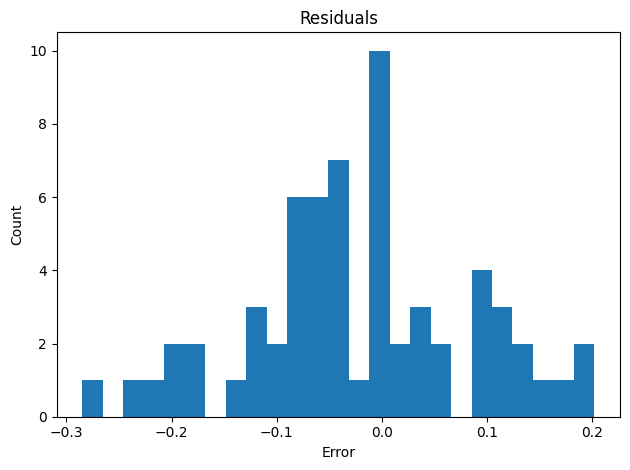

In [68]:
# Plot residual errors
residuals = y_pred - y_test
plt.hist(residuals, bins=25) 
plt.title("Residuals")
plt.xlabel("Error")
plt.ylabel("Count")
plt.tight_layout()
plt.show()